In [355]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as mno
import numpy as np
from sklearn import linear_model
%matplotlib inline
plt.style.use('bmh')

In [356]:
df = pd.read_csv("G:\DBS\Dissertation\Data\England\Championship (2019,2020).csv")

In [357]:
df2 = pd.read_csv("G:\DBS\Dissertation\Data\England\Conference (2019,2020).csv")
df3 = pd.read_csv("G:\DBS\Dissertation\Data\England\League 1 (2019,2020).csv")
df4 = pd.read_csv("G:\DBS\Dissertation\Data\England\League 2(2019,2020).csv")
df5 = pd.read_csv("G:\DBS\Dissertation\Data\England\Premier league (2019,2020).csv")


In [358]:
df_eng = pd.concat([df, df2,df3,df4,df5], ignore_index=True)

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [359]:
df_eng.shape

(2023, 106)

In [360]:
df_eng.head()

,AC,AF,AHCh,AHh,AR,AS,AST,AY,Avg<2.5,Avg>2.5,...,VCCD,VCCH,VCD,VCH,WHA,WHCA,WHCD,WHCH,WHD,WHH
0,11.0,20.0,-0.25,-0.25,0,17.0,8.0,2,1.76,2.06,...,3.4,2.25,3.3,2.38,3.20,3.3,3.3,2.25,3.30,2.30
1,5.0,14.0,0.25,0.25,0,15.0,4.0,1,1.96,1.85,...,3.6,3.40,3.6,3.40,2.15,2.1,3.6,3.40,3.50,3.30
2,2.0,13.0,-0.75,-0.75,0,9.0,5.0,3,1.81,2.01,...,3.9,1.70,3.8,1.80,4.60,5.5,3.8,1.65,3.70,1.78
3,2.0,12.0,-0.50,-0.75,0,1.0,1.0,3,1.95,1.86,...,3.6,1.80,3.9,1.73,5.00,4.0,3.5,1.95,3.75,1.73
4,7.0,18.0,-0.25,-0.25,0,5.0,0.0,3,1.69,2.16,...,3.3,2.45,3.4,2.60,2.80,3.0,3.2,2.45,3.30,2.55


In [361]:
df_eng['Country'] = 'England'

In [362]:
df_eng.head()

,AC,AF,AHCh,AHh,AR,AS,AST,AY,Avg<2.5,Avg>2.5,...,VCCH,VCD,VCH,WHA,WHCA,WHCD,WHCH,WHD,WHH,Country
0,11.0,20.0,-0.25,-0.25,0,17.0,8.0,2,1.76,2.06,...,2.25,3.3,2.38,3.20,3.3,3.3,2.25,3.30,2.30,England
1,5.0,14.0,0.25,0.25,0,15.0,4.0,1,1.96,1.85,...,3.40,3.6,3.40,2.15,2.1,3.6,3.40,3.50,3.30,England
2,2.0,13.0,-0.75,-0.75,0,9.0,5.0,3,1.81,2.01,...,1.70,3.8,1.80,4.60,5.5,3.8,1.65,3.70,1.78,England
3,2.0,12.0,-0.50,-0.75,0,1.0,1.0,3,1.95,1.86,...,1.80,3.9,1.73,5.00,4.0,3.5,1.95,3.75,1.73,England
4,7.0,18.0,-0.25,-0.25,0,5.0,0.0,3,1.69,2.16,...,2.45,3.4,2.60,2.80,3.0,3.2,2.45,3.30,2.55,England


In [363]:
df1_scot = pd.read_csv("G:\DBS\Dissertation\Data\Scotland\Divison 1 (2019,2020).csv")
df2_scot = pd.read_csv("G:\DBS\Dissertation\Data\Scotland\Divison 2 (2019,2020).csv")
df3_scot = pd.read_csv("G:\DBS\Dissertation\Data\Scotland\Divison 3 (2019,2020).csv")
df4_scot = pd.read_csv("G:\DBS\Dissertation\Data\Scotland\Premier League (2019,2020).csv")

In [364]:
df_scot = pd.concat([df1_scot, df2_scot,df3_scot,df4_scot], ignore_index=True)
df_scot['Country'] = 'Scotland'

In [365]:
df_scot.head()

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA,Country
0,SC1,02/08/2019,19:05,Dunfermline,Dundee,2,2,D,2,1,...,0.00,2.10,1.77,2.11,1.79,2.12,1.84,2.05,1.78,Scotland
1,SC1,03/08/2019,15:00,Alloa,Partick,1,1,D,1,0,...,0.50,1.93,1.93,1.97,1.93,2.01,1.95,1.91,1.91,Scotland
2,SC1,03/08/2019,15:00,Arbroath,Queen of Sth,0,0,D,0,0,...,-0.25,2.05,1.80,2.04,1.85,2.08,1.85,2.02,1.81,Scotland
3,SC1,03/08/2019,15:00,Ayr,Morton,4,2,H,1,0,...,-0.50,2.10,1.77,2.08,1.82,2.13,1.82,2.08,1.76,Scotland
4,SC1,03/08/2019,15:00,Dundee United,Inverness C,4,1,H,2,1,...,-0.50,1.88,1.98,1.88,2.02,1.91,2.02,1.87,1.95,Scotland


In [366]:
df1_germ = pd.read_csv("G:\DBS\Dissertation\Data\Germany\Bundesliga 1 (2019,2020).csv")
df2_germ = pd.read_csv("G:\DBS\Dissertation\Data\Germany\Bundesliga 2(2019,2020).csv")
df_germ = pd.concat([df1_germ,df2_germ], ignore_index=True )
df_germ['Country'] = 'Germany'

In [367]:
df_germ.shape

(517, 106)

In [368]:
df1_italy = pd.read_csv("G:\DBS\Dissertation\Data\Italy\Serie A (2019,2020).csv")
df2_italy = pd.read_csv("G:\DBS\Dissertation\Data\Italy\Serie B(2019,2020).csv")
df_italy = pd.concat([df1_italy,df2_italy], ignore_index=True)
df_italy['Country'] = 'Italy'
df_italy.shape
df_italy.head()

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA,Country
0,I1,24/08/2019,17:00,Parma,Juventus,0,1,A,0,1,...,1.50,1.77,2.02,1.81,2.11,1.93,2.12,1.83,2.04,Italy
1,I1,24/08/2019,19:45,Fiorentina,Napoli,3,4,A,1,2,...,0.75,1.75,2.05,1.81,2.11,1.94,2.14,1.80,2.09,Italy
2,I1,25/08/2019,17:00,Udinese,Milan,1,0,H,0,0,...,0.50,1.86,2.07,1.88,2.04,1.91,2.09,1.85,2.04,Italy
3,I1,25/08/2019,19:45,Cagliari,Brescia,0,1,A,0,0,...,-0.75,2.10,1.83,2.11,1.82,2.12,1.85,2.08,1.82,Italy
4,I1,25/08/2019,19:45,Roma,Genoa,3,3,D,2,2,...,-0.75,1.97,1.96,1.98,1.94,1.99,2.20,1.92,1.97,Italy


In [369]:
df1_spain = pd.read_csv("G:\DBS\Dissertation\Data\Spain\La Liga Primera Division (2019,2020).csv")
df2_spain = pd.read_csv("G:\DBS\Dissertation\Data\Spain\La Liga Segunda Division (2019,2020).csv")
df_spain = pd.concat([df1_spain,df2_spain], ignore_index=True)
df_spain['Country'] = 'Spain'


In [370]:
df1_france = pd.read_csv("G:\DBS\Dissertation\Data\France\Division 2 (2019,2020).csv")
df2_france = pd.read_csv("G:\DBS\Dissertation\Data\France\Le Championnat (2019,2020).csv")
df_france = pd.concat([df1_france,df2_france], ignore_index=True)
df_france['Country'] = 'France'

In [371]:
df1_Neth = pd.read_csv("G:\\DBS\\Dissertation\\Data\\Netherlands\\Eredivisie (2019,2020).csv")
df1_Neth['Country'] = 'Netherlands'

In [372]:
df1_Bel = pd.read_csv("G:\DBS\Dissertation\Data\Belgium\Jupiler League (2019,2020).csv")
df1_Bel['Country'] = 'Belgium'

In [373]:
df1_Por = pd.read_csv("G:\DBS\Dissertation\Data\Portugal\Liga I (2019,2020).csv")
df1_Por['Country'] = 'Portugal'

In [374]:
df1_Turk = pd.read_csv("G:\DBS\Dissertation\Data\Turkey\Futbol Ligi 1 (2019,2020).csv")
df1_Turk['Country'] = 'Turkey'

In [375]:
df1_Gre = pd.read_csv("G:\DBS\Dissertation\Data\Greece\Ethniki Katigoria (2019,2020).csv")
df1_Gre['Country'] = 'Greece'
df1_Gre.head()

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA,Country
0,G1,24/08/2019,17:00,Lamia,Panathinaikos,1,1,D,1,1,...,0.50,1.80,2.05,1.83,2.06,1.89,2.12,1.81,2.02,Greece
1,G1,24/08/2019,19:00,Aris,OFI Crete,1,1,D,0,1,...,-1.25,1.98,1.88,2.01,1.87,2.10,1.91,2.01,1.82,Greece
2,G1,24/08/2019,19:30,Olympiakos,Asteras Tripolis,1,0,H,1,0,...,-1.75,2.05,1.80,2.10,1.79,2.13,1.97,1.99,1.84,Greece
3,G1,25/08/2019,17:00,Atromitos,Larisa,1,1,D,1,1,...,-0.75,1.95,1.90,1.98,1.91,1.99,1.94,1.94,1.90,Greece
4,G1,25/08/2019,17:15,Panionios,Volos NFC,1,2,A,0,1,...,-0.25,1.70,2.20,1.68,2.27,2.09,2.27,1.74,2.11,Greece


In [376]:
df_2019_20 = pd.concat([df_eng,df_scot,df_germ,df_italy,df_spain,df_france,df1_Neth,df1_Bel,df1_Por,df1_Turk,df1_Gre], ignore_index=True)

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [377]:
df_2019_20.to_excel("output.xlsx")

In [378]:
null_2019_20 = df_2019_20.isna().sum()

In [379]:
null_2019_20.head()

AC      451
AF      451
AHCh      0
AHh       5
AR        0
dtype: int64

In [380]:
null_2019_20.to_excel("null_2019_2020.xlsx")

In [381]:
#os.chdir(r"C:\Users\USER\Dissertation\Weather") 

In [382]:
#from wwo_hist import retrieve_hist_data
#def weather(team):
    #frequency=24
    #start_date = team['Date']
    #end_date = team['Date']
    #api_key = '28be61a30b5640f69f5183453200707'
    #location_list = [team['HomeTeam']]

    #hist_weather_data = retrieve_hist_data(api_key,
     #                               location_list,
      #                              start_date,
       #                             end_date,
        #                            frequency,
         #                           location_label = False,
          #                          export_csv = True,
           #                         store_df = True)
    #return hist_weather_data

In [383]:
#df_2019_20.apply(weather,axis=1)


In [384]:
#import os
#os.getcwd()

In [385]:
#df_2019_20['HomeTeam'] = df_2019_20['HomeTeam'].replace({"Nott'm Forest": 'Nottingham Forest'})

In [386]:
#df_2019_20.to_excel("output_1.xlsx")

In [387]:
df_2019_20.to_excel("output_imput.xlsx")

In [388]:
#df_2019_20['HomeTeam'] = df_2019_20['HomeTeam'].replace({"Brentford":"Hounslow"})

In [389]:
df_2019_20.head()

,AC,AF,AHCh,AHh,AR,AS,AST,AY,Avg<2.5,Avg>2.5,...,VCCD,VCCH,VCD,VCH,WHA,WHCA,WHCD,WHCH,WHD,WHH
0,11.0,20.0,-0.25,-0.25,0,17.0,8.0,2,1.76,2.06,...,3.4,2.25,3.3,2.38,3.20,3.3,3.3,2.25,3.30,2.30
1,5.0,14.0,0.25,0.25,0,15.0,4.0,1,1.96,1.85,...,3.6,3.40,3.6,3.40,2.15,2.1,3.6,3.40,3.50,3.30
2,2.0,13.0,-0.75,-0.75,0,9.0,5.0,3,1.81,2.01,...,3.9,1.70,3.8,1.80,4.60,5.5,3.8,1.65,3.70,1.78
3,2.0,12.0,-0.50,-0.75,0,1.0,1.0,3,1.95,1.86,...,3.6,1.80,3.9,1.73,5.00,4.0,3.5,1.95,3.75,1.73
4,7.0,18.0,-0.25,-0.25,0,5.0,0.0,3,1.69,2.16,...,3.3,2.45,3.4,2.60,2.80,3.0,3.2,2.45,3.30,2.55


In [390]:
df_2019_20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5932 entries, 0 to 5931
Columns: 107 entries, AC to WHH
dtypes: float64(90), int64(8), object(9)
memory usage: 4.8+ MB


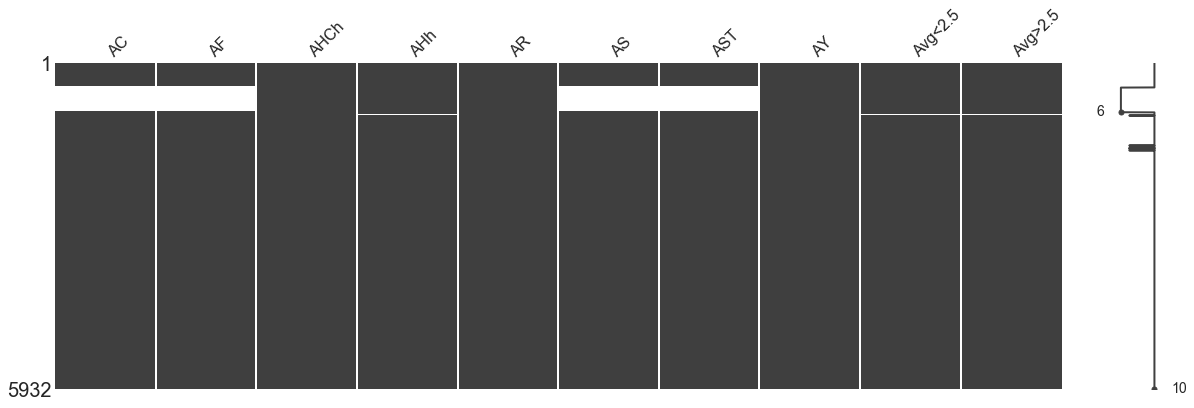

In [391]:
mno.matrix(df_2019_20.iloc[:,0:10], figsize = (20, 6))

In [392]:
import os
os.getcwd()

'G:\\DBS\\Dissertation\\Directory'

In [393]:
os.chdir("G:\DBS\Dissertation\Directory")

In [394]:
missing_cols3 = ["AC","AF",
"AHh",
"AS",
"AST",
"Avg<2.5",
"Avg>2.5",
"AvgA",
"AvgAHA",
"AvgAHH",
"AvgD",
"AvgH",
"B365<2.5",
"B365>2.5",
"B365A",
"B365AHA",
"B365AHH",
"B365CAHA",
"B365CAHH",
"B365D",
"B365H",
"BWA",
"BWCA",
"BWCD",
"BWCH",
"BWD",
"BWH",
"HC",
"HF",
"HS",
"HST",
"IWA",
"IWCA",
"IWCD",
"IWCH",
"IWD",
"IWH",
"Max<2.5",
"Max>2.5",
"MaxA",
"MaxAHA",
"MaxAHH",
"MaxD",
"MaxH",
"P<2.5",
"P>2.5",
"PAHA",
"PAHH",
"PC<2.5",
"PC>2.5",
"PCAHA",
"PCAHH",
"PSA",
"PSCA",
"PSCD",
"PSCH",
"PSD",
"PSH",
"VCA",
"VCCA",
"VCCD",
"VCCH",
"VCD",
"VCH",
"WHA",
"WHCA",
"WHCD",
"WHCH",
"WHD",
"WHH"
]

In [395]:
def random_imputation(df_2019_20, feature):

    number_missing = df_2019_20[feature].isnull().sum()
    observed_values = df_2019_20.loc[df_2019_20[feature].notnull(), feature]
    df_2019_20.loc[df_2019_20[feature].isnull(),feature] = np.random.choice(observed_values, number_missing, replace = True)
    
    return df_2019_20

In [396]:
for feature in missing_cols3:
    #df_2019_20[feature + '_imp'] = df_2019_20[feature]
    df_2019_20 = random_imputation(df_2019_20, feature)

In [397]:
df_2019_20.shape

(5932, 107)

In [398]:
df_2019_20 = df_2019_20.drop(['Referee', 'Time'], axis = 1) 

In [399]:
df_2019_20.describe()

,AC,AF,AHCh,AHh,AR,AS,AST,AY,Avg<2.5,Avg>2.5,...,VCCD,VCCH,VCD,VCH,WHA,WHCA,WHCD,WHCH,WHD,WHH
count,5932.000000,5932.000000,5932.000000,5932.000000,5932.000000,5932.000000,5932.000000,5932.000000,5932.000000,5932.000000,...,5932.000000,5932.000000,5932.000000,5932.000000,5932.000000,5932.000000,5932.000000,5932.000000,5932.000000,5932.000000
mean,4.518543,13.376939,-0.287298,-0.294547,0.122556,10.568948,3.831760,2.184929,1.961136,1.932406,...,3.805888,2.607512,3.778292,2.580772,4.148395,4.204929,3.764186,2.592053,3.738704,2.560499
std,2.622451,4.229330,0.690679,0.670722,0.349845,4.475430,2.256749,1.409325,0.405781,0.320704,...,1.128355,1.706983,1.044019,1.707619,3.417566,3.575918,1.096710,1.748580,0.990591,1.635980
min,0.000000,1.000000,-4.000000,-3.750000,0.000000,0.000000,0.000000,0.000000,1.330000,1.090000,...,2.630000,1.030000,2.700000,1.040000,1.050000,1.040000,2.620000,1.020000,2.700000,1.020000
25%,3.000000,10.000000,-0.500000,-0.500000,0.000000,7.000000,2.000000,1.000000,1.700000,1.700000,...,3.300000,1.800000,3.300000,1.830000,2.550000,2.550000,3.250000,1.800000,3.250000,1.800000
50%,4.000000,13.000000,-0.250000,-0.250000,0.000000,10.000000,4.000000,2.000000,1.880000,1.910000,...,3.500000,2.250000,3.500000,2.250000,3.300000,3.250000,3.500000,2.200000,3.500000,2.200000
75%,6.000000,16.000000,0.000000,0.000000,0.000000,13.000000,5.000000,3.000000,2.120000,2.120000,...,3.900000,2.800000,3.800000,2.750000,4.400000,4.500000,3.800000,2.800000,3.800000,2.750000
max,17.000000,36.000000,3.250000,3.000000,3.000000,33.000000,22.000000,9.000000,6.690000,3.200000,...,15.000000,29.000000,15.000000,46.000000,41.000000,51.000000,15.000000,29.000000,15.000000,29.000000


In [400]:
df_2019_20['Total_Goals'] = df_2019_20['FTAG'] + df_2019_20['FTHG']

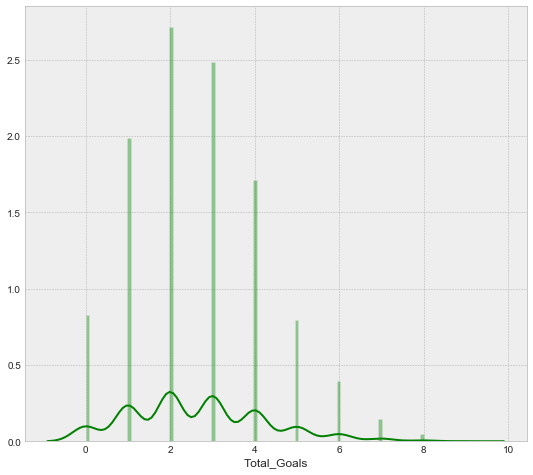

In [401]:
plt.figure(figsize=(9, 8))
sns.distplot(df_2019_20['Total_Goals'], color='g', bins=100, hist_kws={'alpha': 0.4});

In [402]:
#total goals is normally distributed
#2 is the highest no of total goals 

In [403]:
df_2019_20['FTR'].value_counts()

H    2593
A    1739
D    1600
Name: FTR, dtype: int64

In [404]:
#the data is not balanced as the FTR data leans towards the Home wins

In [405]:
Full_time_res = pd.get_dummies(df_2019_20['FTR'])

In [406]:
Full_time_res.rename(columns={'H':'FTR_H','D':'FTR_D','A':'FTR_A'},inplace=True)

In [407]:
Full_time_res.head()

,FTR_A,FTR_D,FTR_H
0,0,1,0
1,0,0,1
2,1,0,0
3,1,0,0
4,0,0,1


In [408]:
half_time_res = pd.get_dummies(df_2019_20['HTR'])

In [409]:
half_time_res.rename(columns={'H':'HTR_H','D':'HTR_D','A':'HTR_A'},inplace=True)

In [410]:
#df_2019_20.drop({'FTR','HTR'},axis=1,inplace=True)

In [411]:
df_2019_20 = pd.concat([df_2019_20,Full_time_res,half_time_res],axis=1)

In [412]:
condition = [(df_2019_20['Total_Goals'] > 2.5),(df_2019_20['Total_Goals'] < 2.5)]
values = ['1','0']
df_2019_20['Above 2.5'] = np.select(condition,values)

In [413]:
df_2019_20.to_excel("df_new.xlsx")

In [414]:
df_2019_20['Above 2.5'].value_counts()

1    2985
0    2947
Name: Above 2.5, dtype: int64

In [415]:
df_2019_20.shape

(5932, 113)

In [416]:
df_corr = df_2019_20.corr(method='pearson')

C:\Users\USER\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


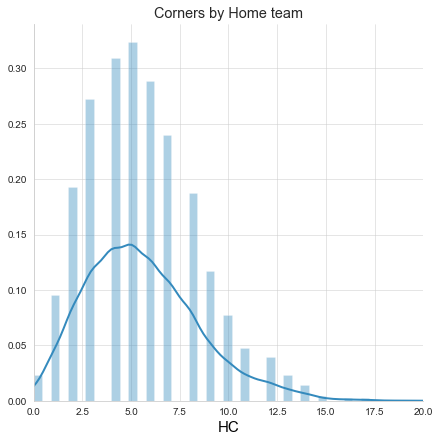

C:\Users\USER\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


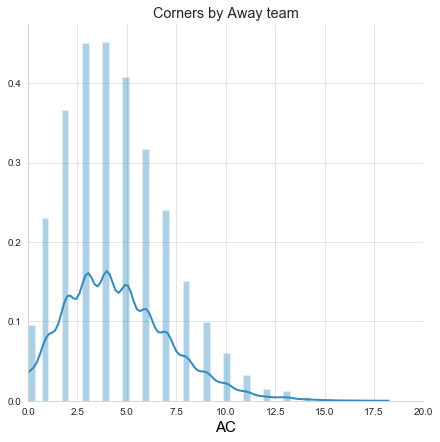

In [417]:
sns.set_style("whitegrid")
a=sns.FacetGrid(df_2019_20,size=6) \
   .map(sns.distplot,"HC") \
   .add_legend()
plt.xlim(0,20)
plt.xlabel("HC",size=15,color="Black")
plt.title("Corners by Home team")
plt.show()
sns.set_style("whitegrid")
sns.FacetGrid(df_2019_20,size=6,) \
   .map(sns.distplot,"AC") \
   .add_legend()
plt.xlabel("AC",size=15,color="Black")
plt.title("Corners by Away team")
plt.xlim(0,20)
plt.show()


In [418]:
#Home team corners = 5 is maximum and the next maximum are 4 and 6.
#Away team corners = 3 is maximum and the next maximum are 4 and 5.

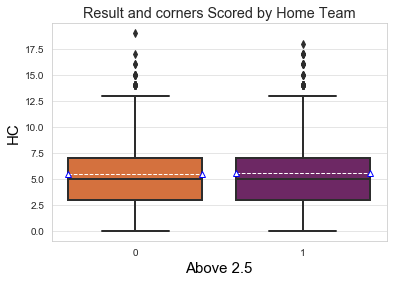

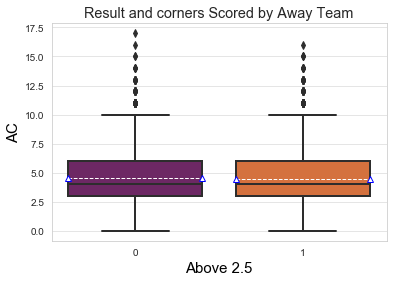

In [419]:
sns.boxplot(data=df_2019_20,x="Above 2.5",y="HC",palette="inferno_r", \
            meanline=True,showmeans=True,\
            meanprops={"marker":"^","markerfacecolor":"white", "markeredgecolor":"blue","color":"White"})
plt.title("Result and corners Scored by Home Team")
plt.xlabel("Above 2.5",size=15,color="Black")
plt.ylabel("HC",size=15,color="Black")
plt.show()

sns.boxplot(data=df_2019_20,x="Above 2.5",y="AC",palette="inferno", \
            meanline=True,showmeans=True,\
            meanprops={"marker":"^","markerfacecolor":"white", "markeredgecolor":"blue","color":"White"})
plt.title("Result and corners Scored by Away Team")
plt.xlabel("Above 2.5",size=15,color="Black")
plt.ylabel("AC",size=15,color="Black")
plt.show()


In [420]:
#with respect to goals scored above/below 2.5, average corners by home teams are higher than the away teams where
#average corners by home teams are around 5 in matches with total goals above and below 2.5

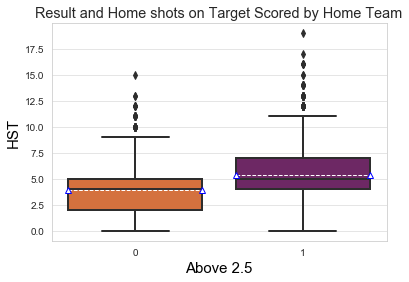

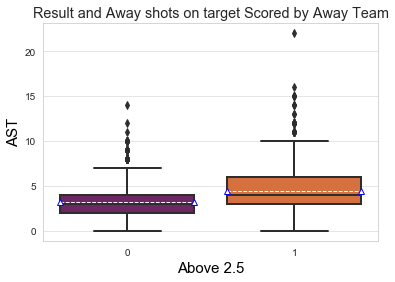

In [421]:
sns.boxplot(data=df_2019_20,x="Above 2.5",y="HST",palette="inferno_r", \
            meanline=True,showmeans=True,\
            meanprops={"marker":"^","markerfacecolor":"white", "markeredgecolor":"blue","color":"White"})
plt.title("Result and Home shots on Target Scored by Home Team")
plt.xlabel("Above 2.5",size=15,color="Black")
plt.ylabel("HST",size=15,color="Black")
plt.show()

sns.boxplot(data=df_2019_20,x="Above 2.5",y="AST",palette="inferno", \
            meanline=True,showmeans=True,\
            meanprops={"marker":"^","markerfacecolor":"white", "markeredgecolor":"blue","color":"White"})
plt.title("Result and Away shots on target Scored by Away Team")
plt.xlabel("Above 2.5",size=15,color="Black")
plt.ylabel("AST",size=15,color="Black")
plt.show()

In [422]:
#the average home shots on target is 5 when total goals are above 2.5 and 4 when goals are below 2.5
#the average away shots on target is 4 when total goals are above 2.5 and 3 when goals are below 2.5

C:\Users\USER\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\USER\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


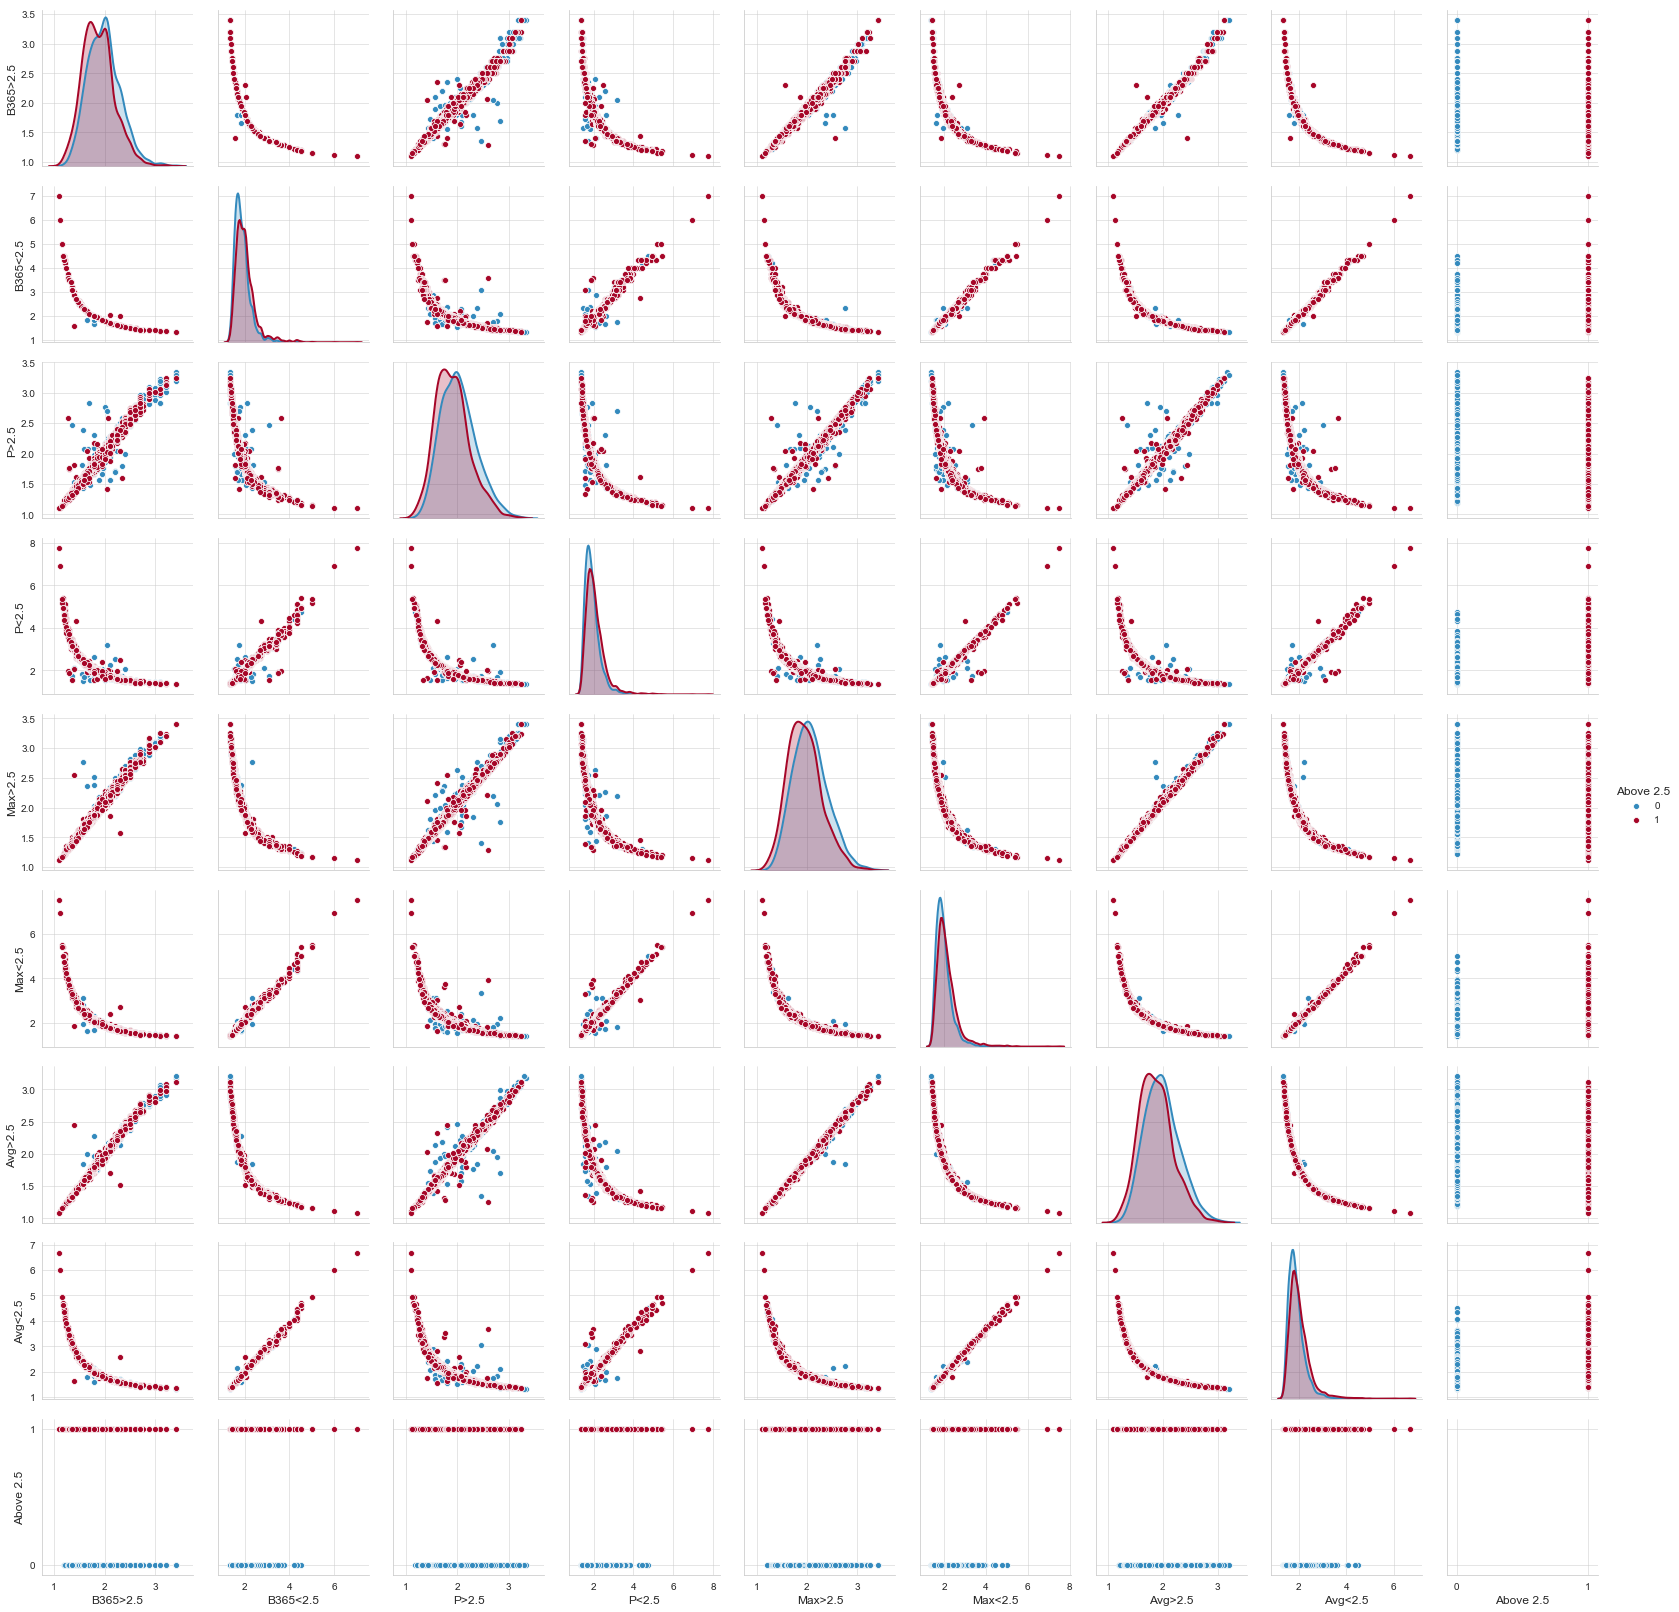

In [423]:
sns.pairplot(data=df_2019_20[['B365>2.5','B365<2.5','P>2.5','P<2.5','Max>2.5','Max<2.5','Avg>2.5','Avg<2.5','Above 2.5']],
            hue='Above 2.5')

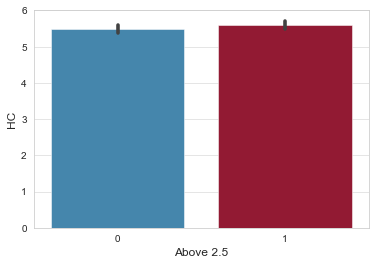

In [424]:
sns.barplot(x='Above 2.5', y='HC', data=df_2019_20)
#sns.barplot(y='Above 2.5', x='HC', data=df_2019_20) 

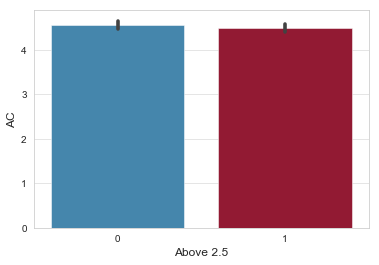

In [425]:
sns.barplot(x='Above 2.5', y='AC', data=df_2019_20)

In [426]:
df_teams_above2_5 = df_2019_20.groupby(['Above 2.5','HomeTeam']).size()

In [427]:
df_teams_above2_5.to_excel("df_teams_above2_5.xlsx")

In [462]:
df_sort.to_excel("df_after_sort.xlsx")

In [433]:
df_2019_20_new['Date'] = pd.to_datetime(df_2019_20_new['Date'], dayfirst = True)

In [430]:
#df_2019_20['Date']   = df_2019_20.sort_values(['Date'], ascending=[True])

In [431]:
df_2019_20_new = df_2019_20

In [434]:
df_2019_20_new.to_excel("df_after_datetime.xlsx")

In [436]:
df_sort = df_2019_20_new.groupby('HomeTeam').apply(lambda x: x.sort_values('Date'))

In [463]:
df_sort = pd.read_excel("G:\DBS\Dissertation\Directory\df_sort.xlsx", encoding='latin-1')

In [464]:
df_sort['HC_Avg_1']=df_sort.groupby('HomeTeam',sort=False).rolling(window=5).HC.mean().reset_index(drop='HomeTeam')

In [465]:
df_sort['HS_Avg_1']=df_sort.groupby('HomeTeam',sort=False).rolling(window=5).HS.mean().reset_index(drop='HomeTeam')
df_sort['AS_Avg_1']=df_sort.groupby('HomeTeam',sort=False).rolling(window=5).AS.mean().reset_index(drop='HomeTeam')
df_sort['HST_Avg_1']=df_sort.groupby('HomeTeam',sort=False).rolling(window=5).HST.mean().reset_index(drop='HomeTeam')
df_sort['AST_Avg_1']=df_sort.groupby('HomeTeam',sort=False).rolling(window=5).AST.mean().reset_index(drop='HomeTeam')
df_sort['AC_Avg_1']=df_sort.groupby('HomeTeam',sort=False).rolling(window=5).AC.mean().reset_index(drop='HomeTeam')
df_sort['HF_Avg_1']=df_sort.groupby('HomeTeam',sort=False).rolling(window=5).HF.mean().reset_index(drop='HomeTeam')
df_sort['AF_Avg_1']=df_sort.groupby('HomeTeam',sort=False).rolling(window=5).AF.mean().reset_index(drop='HomeTeam')
df_sort['HY_Avg_1']=df_sort.groupby('HomeTeam',sort=False).rolling(window=5).HY.mean().reset_index(drop='HomeTeam')
df_sort['AY_Avg_1']=df_sort.groupby('HomeTeam',sort=False).rolling(window=5).AY.mean().reset_index(drop='HomeTeam')
df_sort['HR_Avg_1']=df_sort.groupby('HomeTeam',sort=False).rolling(window=5).HR.mean().reset_index(drop='HomeTeam')
df_sort['AR_Avg_1']=df_sort.groupby('HomeTeam',sort=False).rolling(window=5).AR.mean().reset_index(drop='HomeTeam')

In [458]:
df_sort.to_excel("df_sort2.xlsx")

In [473]:
missing_cols4 = ["HC_Avg_2","HS_Avg_2","AS_Avg_2","HST_Avg_2","AST_Avg_2","AC_Avg_2","HF_Avg_2","AF_Avg_2",
                 "HY_Avg_2","AY_Avg_2","HR_Avg_2","AR_Avg_2"]

In [474]:
def random_imputation(df_sort, feature):

    number_missing = df_sort[feature].isnull().sum()
    observed_values = df_sort.loc[df_sort[feature].notnull(), feature]
    df_sort.loc[df_sort[feature].isnull(),feature] = np.random.choice(observed_values, number_missing, replace = True)
    
    return df_sort


In [475]:
for feature in missing_cols4:
    #df_2019_20[feature + '_imp'] = df_2019_20[feature]
    df_sort = random_imputation(df_sort, feature)

In [466]:
df_sort = df_sort.groupby('AwayTeam').apply(lambda x: x.sort_values('Date'))

In [476]:
df_sort.to_excel("df_sort_new.xlsx")

In [468]:
df_sort = pd.read_excel("G:\DBS\Dissertation\Directory\df_sort_Away.xlsx", encoding='latin-1')

In [472]:
df_sort['HC_Avg_2']=df_sort.groupby('AwayTeam',sort=False).rolling(window=5).HC.mean().reset_index(drop='AwayTeam')
df_sort['HS_Avg_2']=df_sort.groupby('AwayTeam',sort=False).rolling(window=5).HS.mean().reset_index(drop='AwayTeam')
df_sort['AS_Avg_2']=df_sort.groupby('AwayTeam',sort=False).rolling(window=5).AS.mean().reset_index(drop='AwayTeam')
df_sort['HST_Avg_2']=df_sort.groupby('AwayTeam',sort=False).rolling(window=5).HST.mean().reset_index(drop='AwayTeam')
df_sort['AST_Avg_2']=df_sort.groupby('AwayTeam',sort=False).rolling(window=5).AST.mean().reset_index(drop='AwayTeam')
df_sort['AC_Avg_2']=df_sort.groupby('AwayTeam',sort=False).rolling(window=5).AC.mean().reset_index(drop='AwayTeam')
df_sort['HF_Avg_2']=df_sort.groupby('AwayTeam',sort=False).rolling(window=5).HF.mean().reset_index(drop='AwayTeam')
df_sort['AF_Avg_2']=df_sort.groupby('AwayTeam',sort=False).rolling(window=5).AF.mean().reset_index(drop='AwayTeam')
df_sort['HY_Avg_2']=df_sort.groupby('AwayTeam',sort=False).rolling(window=5).HY.mean().reset_index(drop='AwayTeam')
df_sort['AY_Avg_2']=df_sort.groupby('AwayTeam',sort=False).rolling(window=5).AY.mean().reset_index(drop='AwayTeam')
df_sort['HR_Avg_2']=df_sort.groupby('AwayTeam',sort=False).rolling(window=5).HR.mean().reset_index(drop='AwayTeam')
df_sort['AR_Avg_2']=df_sort.groupby('AwayTeam',sort=False).rolling(window=5).AR.mean().reset_index(drop='AwayTeam')

In [477]:
df_new = df_sort.drop(['HC', 'HS','AS','HST','AST','AC','HF','AF','HY','AY','HR','AR'], axis = 1) 

In [480]:
df_new.shape

(5932, 129)

C:\Users\USER\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


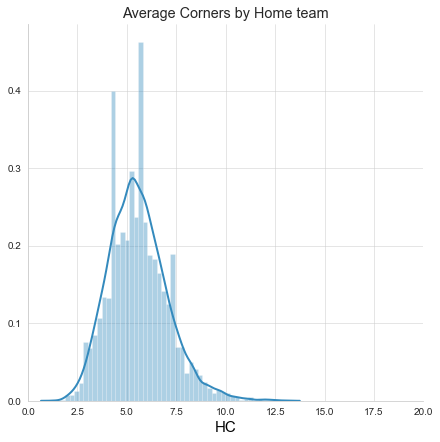

C:\Users\USER\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


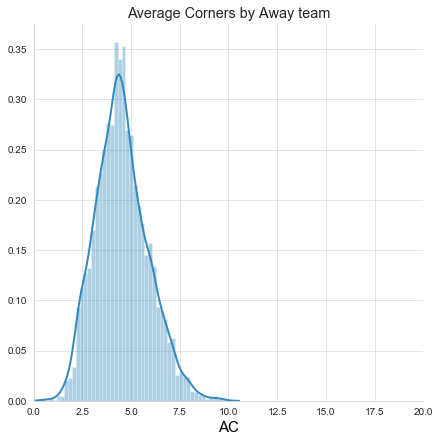

In [482]:
sns.set_style("whitegrid")
a=sns.FacetGrid(df_new,size=6) \
   .map(sns.distplot,"HC_Avg_1") \
   .add_legend()
plt.xlim(0,20)
plt.xlabel("HC",size=15,color="Black")
plt.title("Average Corners by Home team")
plt.show()
sns.set_style("whitegrid")
sns.FacetGrid(df_new,size=6,) \
   .map(sns.distplot,"AC_Avg_1") \
   .add_legend()
plt.xlabel("AC",size=15,color="Black")
plt.title("Average Corners by Away team")
plt.xlim(0,20)
plt.show()


C:\Users\USER\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


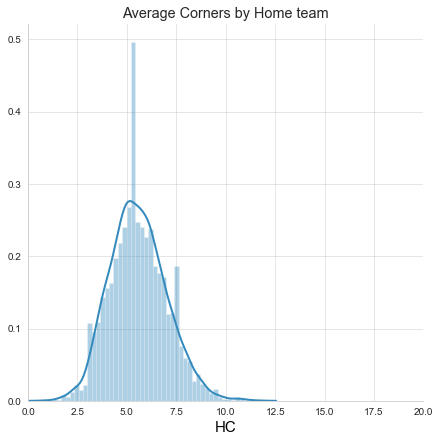

C:\Users\USER\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


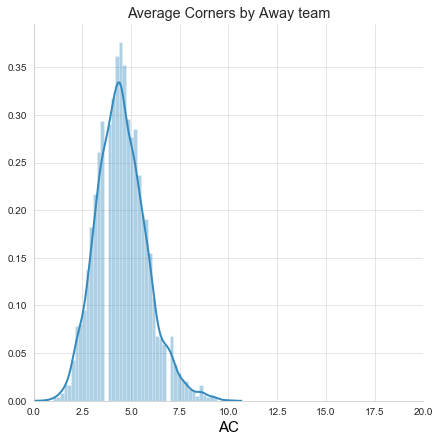

In [483]:
sns.set_style("whitegrid")
a=sns.FacetGrid(df_new,size=6) \
   .map(sns.distplot,"HC_Avg_2") \
   .add_legend()
plt.xlim(0,20)
plt.xlabel("HC",size=15,color="Black")
plt.title("Average Corners by Home team")
plt.show()
sns.set_style("whitegrid")
sns.FacetGrid(df_new,size=6,) \
   .map(sns.distplot,"AC_Avg_2") \
   .add_legend()
plt.xlabel("AC",size=15,color="Black")
plt.title("Average Corners by Away team")
plt.xlim(0,20)
plt.show()


C:\Users\USER\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


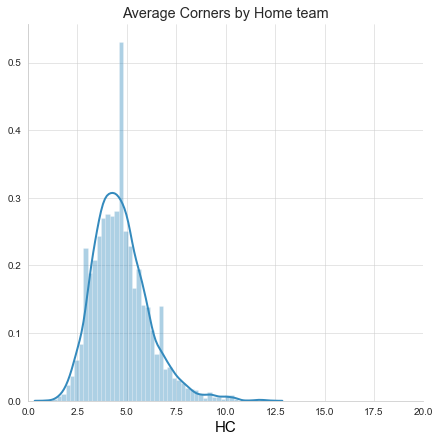

C:\Users\USER\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


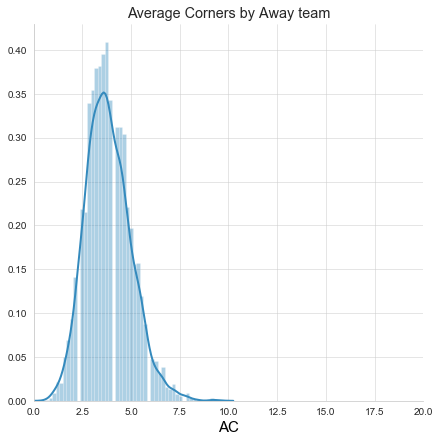

In [484]:
sns.set_style("whitegrid")
a=sns.FacetGrid(df_new,size=6) \
   .map(sns.distplot,"HST_Avg_1") \
   .add_legend()
plt.xlim(0,20)
plt.xlabel("HC",size=15,color="Black")
plt.title("Average Corners by Home team")
plt.show()
sns.set_style("whitegrid")
sns.FacetGrid(df_new,size=6,) \
   .map(sns.distplot,"AST_Avg_1") \
   .add_legend()
plt.xlabel("AC",size=15,color="Black")
plt.title("Average Corners by Away team")
plt.xlim(0,20)
plt.show()


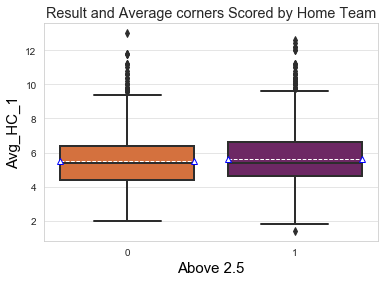

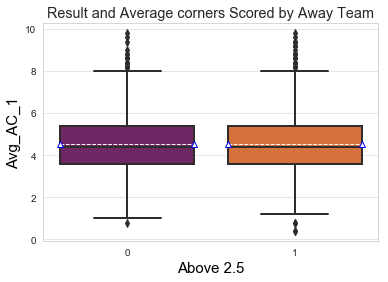

In [488]:
sns.boxplot(data=df_new,x="Above 2.5",y="HC_Avg_1",palette="inferno_r", \
            meanline=True,showmeans=True,\
            meanprops={"marker":"^","markerfacecolor":"white", "markeredgecolor":"blue","color":"White"})
plt.title("Result and Average corners Scored by Home Team")
plt.xlabel("Above 2.5",size=15,color="Black")
plt.ylabel("Avg_HC_1",size=15,color="Black")
plt.show()

sns.boxplot(data=df_new,x="Above 2.5",y="AC_Avg_1",palette="inferno", \
            meanline=True,showmeans=True,\
            meanprops={"marker":"^","markerfacecolor":"white", "markeredgecolor":"blue","color":"White"})
plt.title("Result and Average corners Scored by Away Team")
plt.xlabel("Above 2.5",size=15,color="Black")
plt.ylabel("Avg_AC_1",size=15,color="Black")
plt.show()


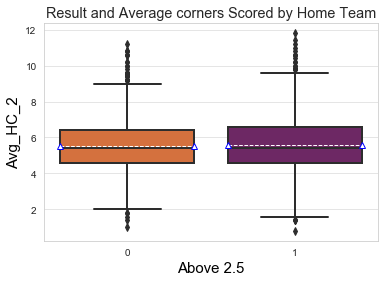

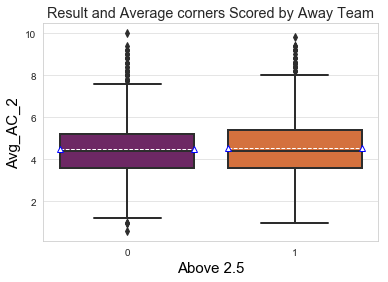

In [489]:
sns.boxplot(data=df_new,x="Above 2.5",y="HC_Avg_2",palette="inferno_r", \
            meanline=True,showmeans=True,\
            meanprops={"marker":"^","markerfacecolor":"white", "markeredgecolor":"blue","color":"White"})
plt.title("Result and Average corners Scored by Home Team")
plt.xlabel("Above 2.5",size=15,color="Black")
plt.ylabel("Avg_HC_2",size=15,color="Black")
plt.show()

sns.boxplot(data=df_new,x="Above 2.5",y="AC_Avg_2",palette="inferno", \
            meanline=True,showmeans=True,\
            meanprops={"marker":"^","markerfacecolor":"white", "markeredgecolor":"blue","color":"White"})
plt.title("Result and Average corners Scored by Away Team")
plt.xlabel("Above 2.5",size=15,color="Black")
plt.ylabel("Avg_AC_2",size=15,color="Black")
plt.show()


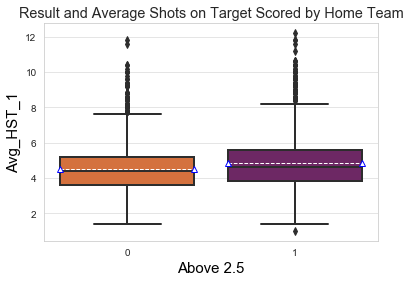

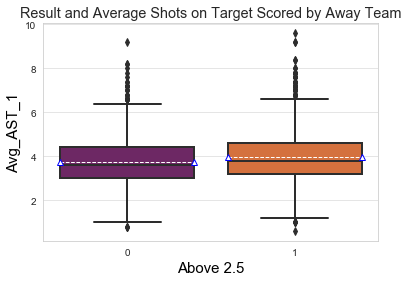

In [490]:
sns.boxplot(data=df_new,x="Above 2.5",y="HST_Avg_1",palette="inferno_r", \
            meanline=True,showmeans=True,\
            meanprops={"marker":"^","markerfacecolor":"white", "markeredgecolor":"blue","color":"White"})
plt.title("Result and Average Shots on Target Scored by Home Team")
plt.xlabel("Above 2.5",size=15,color="Black")
plt.ylabel("Avg_HST_1",size=15,color="Black")
plt.show()

sns.boxplot(data=df_new,x="Above 2.5",y="AST_Avg_1",palette="inferno", \
            meanline=True,showmeans=True,\
            meanprops={"marker":"^","markerfacecolor":"white", "markeredgecolor":"blue","color":"White"})
plt.title("Result and Average Shots on Target Scored by Away Team")
plt.xlabel("Above 2.5",size=15,color="Black")
plt.ylabel("Avg_AST_1",size=15,color="Black")
plt.show()


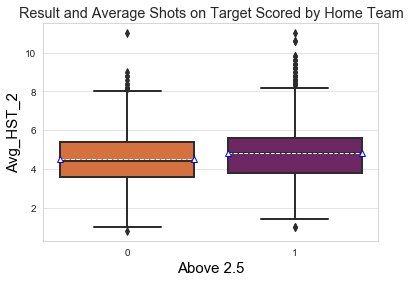

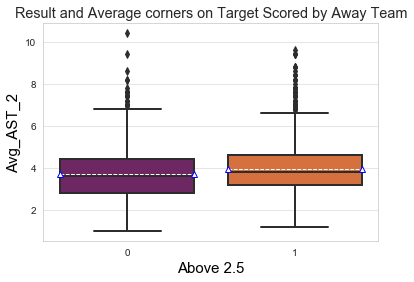

In [495]:
sns.boxplot(data=df_new,x="Above 2.5",y="HST_Avg_2",palette="inferno_r", \
            meanline=True,showmeans=True,\
            meanprops={"marker":"^","markerfacecolor":"white", "markeredgecolor":"blue","color":"White"})
plt.title("Result and Average Shots on Target Scored by Home Team")
plt.xlabel("Above 2.5",size=15,color="Black")
plt.ylabel("Avg_HST_2",size=15,color="Black")
plt.show()

sns.boxplot(data=df_new,x="Above 2.5",y="AST_Avg_2",palette="inferno", \
            meanline=True,showmeans=True,\
            meanprops={"marker":"^","markerfacecolor":"white", "markeredgecolor":"blue","color":"White"})
plt.title("Result and Average corners on Target Scored by Away Team")
plt.xlabel("Above 2.5",size=15,color="Black")
plt.ylabel("Avg_AST_2",size=15,color="Black")
plt.show()


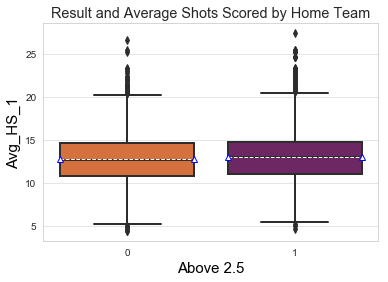

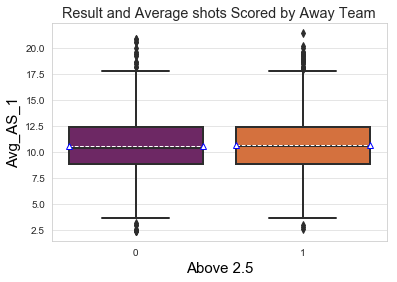

In [496]:
sns.boxplot(data=df_new,x="Above 2.5",y="HS_Avg_1",palette="inferno_r", \
            meanline=True,showmeans=True,\
            meanprops={"marker":"^","markerfacecolor":"white", "markeredgecolor":"blue","color":"White"})
plt.title("Result and Average Shots Scored by Home Team")
plt.xlabel("Above 2.5",size=15,color="Black")
plt.ylabel("Avg_HS_1",size=15,color="Black")
plt.show()

sns.boxplot(data=df_new,x="Above 2.5",y="AS_Avg_1",palette="inferno", \
            meanline=True,showmeans=True,\
            meanprops={"marker":"^","markerfacecolor":"white", "markeredgecolor":"blue","color":"White"})
plt.title("Result and Average shots Scored by Away Team")
plt.xlabel("Above 2.5",size=15,color="Black")
plt.ylabel("Avg_AS_1",size=15,color="Black")
plt.show()

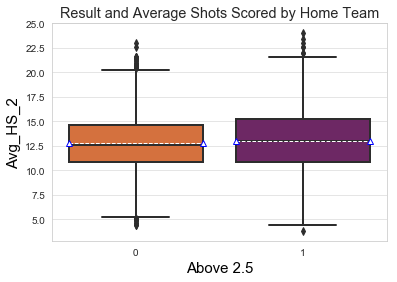

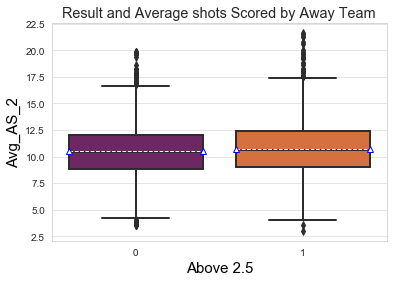

In [497]:
sns.boxplot(data=df_new,x="Above 2.5",y="HS_Avg_2",palette="inferno_r", \
            meanline=True,showmeans=True,\
            meanprops={"marker":"^","markerfacecolor":"white", "markeredgecolor":"blue","color":"White"})
plt.title("Result and Average Shots Scored by Home Team")
plt.xlabel("Above 2.5",size=15,color="Black")
plt.ylabel("Avg_HS_2",size=15,color="Black")
plt.show()

sns.boxplot(data=df_new,x="Above 2.5",y="AS_Avg_2",palette="inferno", \
            meanline=True,showmeans=True,\
            meanprops={"marker":"^","markerfacecolor":"white", "markeredgecolor":"blue","color":"White"})
plt.title("Result and Average shots Scored by Away Team")
plt.xlabel("Above 2.5",size=15,color="Black")
plt.ylabel("Avg_AS_2",size=15,color="Black")
plt.show()

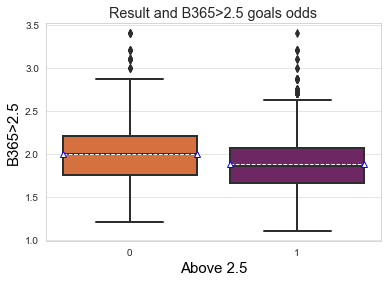

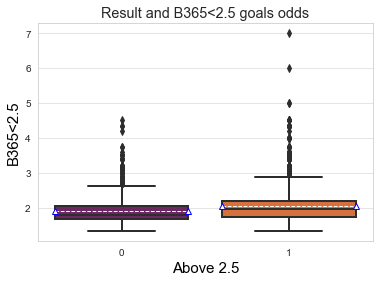

In [499]:
sns.boxplot(data=df_new,x="Above 2.5",y="B365>2.5",palette="inferno_r", \
            meanline=True,showmeans=True,\
            meanprops={"marker":"^","markerfacecolor":"white", "markeredgecolor":"blue","color":"White"})
plt.title("Result and B365>2.5 goals odds")
plt.xlabel("Above 2.5",size=15,color="Black")
plt.ylabel("B365>2.5",size=15,color="Black")
plt.show()

sns.boxplot(data=df_new,x="Above 2.5",y="B365<2.5",palette="inferno", \
            meanline=True,showmeans=True,\
            meanprops={"marker":"^","markerfacecolor":"white", "markeredgecolor":"blue","color":"White"})
plt.title("Result and B365<2.5 goals odds")
plt.xlabel("Above 2.5",size=15,color="Black")
plt.ylabel("B365<2.5",size=15,color="Black")
plt.show()

In [ ]:
#Incidentally, average B365 odds for goals greater than 2.5 is higher when total goals are less than 2.5.
# Average B365 odds for goals lesser than 2.5 is higher when total goals are above 2.5.

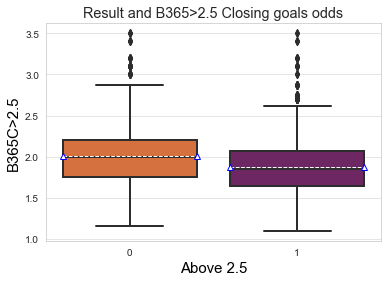

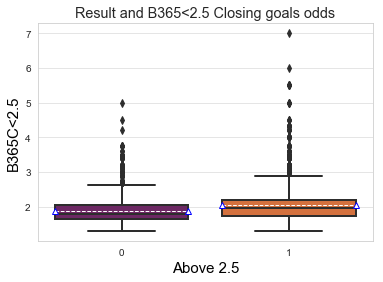

In [508]:
sns.boxplot(data=df_new,x="Above 2.5",y="B365C>2.5",palette="inferno_r", \
            meanline=True,showmeans=True,\
            meanprops={"marker":"^","markerfacecolor":"white", "markeredgecolor":"blue","color":"White"})
plt.title("Result and B365>2.5 Closing goals odds")
plt.xlabel("Above 2.5",size=15,color="Black")
plt.ylabel("B365C>2.5",size=15,color="Black")
plt.show()

sns.boxplot(data=df_new,x="Above 2.5",y="B365C<2.5",palette="inferno", \
            meanline=True,showmeans=True,\
            meanprops={"marker":"^","markerfacecolor":"white", "markeredgecolor":"blue","color":"White"})
plt.title("Result and B365<2.5 Closing goals odds")
plt.xlabel("Above 2.5",size=15,color="Black")
plt.ylabel("B365C<2.5",size=15,color="Black")
plt.show()

In [ ]:
#Bet 365 closing odds for goals above/under 2.5 shows trends similar to normal Bet 365 odds.

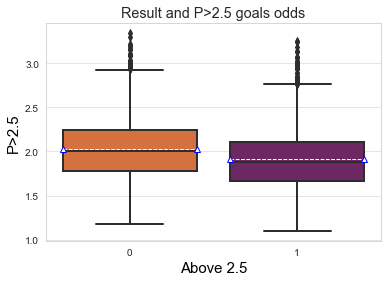

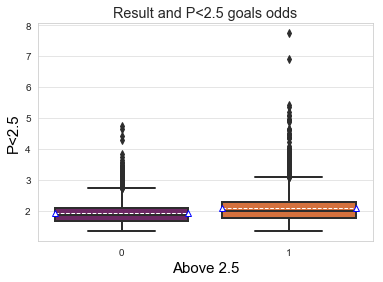

In [500]:
sns.boxplot(data=df_new,x="Above 2.5",y="P>2.5",palette="inferno_r", \
            meanline=True,showmeans=True,\
            meanprops={"marker":"^","markerfacecolor":"white", "markeredgecolor":"blue","color":"White"})
plt.title("Result and P>2.5 goals odds")
plt.xlabel("Above 2.5",size=15,color="Black")
plt.ylabel("P>2.5",size=15,color="Black")
plt.show()

sns.boxplot(data=df_new,x="Above 2.5",y="P<2.5",palette="inferno", \
            meanline=True,showmeans=True,\
            meanprops={"marker":"^","markerfacecolor":"white", "markeredgecolor":"blue","color":"White"})
plt.title("Result and P<2.5 goals odds")
plt.xlabel("Above 2.5",size=15,color="Black")
plt.ylabel("P<2.5",size=15,color="Black")
plt.show()

In [ ]:
#Pinnacle also shows similar pattern like B365

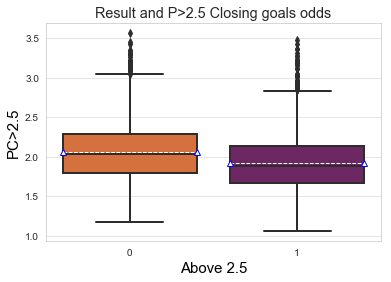

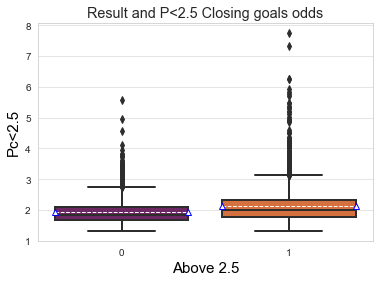

In [509]:
sns.boxplot(data=df_new,x="Above 2.5",y="PC>2.5",palette="inferno_r", \
            meanline=True,showmeans=True,\
            meanprops={"marker":"^","markerfacecolor":"white", "markeredgecolor":"blue","color":"White"})
plt.title("Result and P>2.5 Closing goals odds")
plt.xlabel("Above 2.5",size=15,color="Black")
plt.ylabel("PC>2.5",size=15,color="Black")
plt.show()

sns.boxplot(data=df_new,x="Above 2.5",y="PC<2.5",palette="inferno", \
            meanline=True,showmeans=True,\
            meanprops={"marker":"^","markerfacecolor":"white", "markeredgecolor":"blue","color":"White"})
plt.title("Result and P<2.5 Closing goals odds")
plt.xlabel("Above 2.5",size=15,color="Black")
plt.ylabel("PC<2.5",size=15,color="Black")
plt.show()

In [ ]:
#Bet 365 closing odds for goals above/under 2.5 shows trends similar to normal Bet 365 odds.

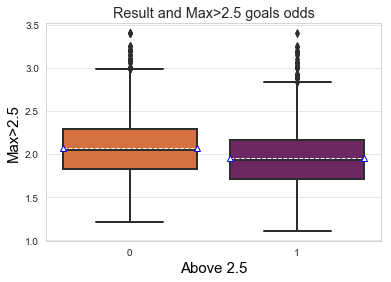

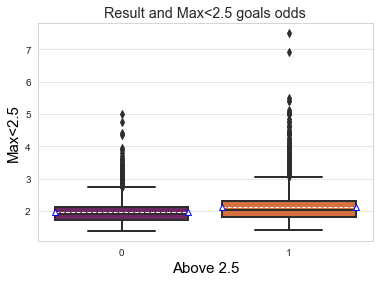

In [501]:
sns.boxplot(data=df_new,x="Above 2.5",y="Max>2.5",palette="inferno_r", \
            meanline=True,showmeans=True,\
            meanprops={"marker":"^","markerfacecolor":"white", "markeredgecolor":"blue","color":"White"})
plt.title("Result and Max>2.5 goals odds")
plt.xlabel("Above 2.5",size=15,color="Black")
plt.ylabel("Max>2.5",size=15,color="Black")
plt.show()

sns.boxplot(data=df_new,x="Above 2.5",y="Max<2.5",palette="inferno", \
            meanline=True,showmeans=True,\
            meanprops={"marker":"^","markerfacecolor":"white", "markeredgecolor":"blue","color":"White"})
plt.title("Result and Max<2.5 goals odds")
plt.xlabel("Above 2.5",size=15,color="Black")
plt.ylabel("Max<2.5",size=15,color="Black")
plt.show()

In [ ]:
#Maximum odds for goals greater than 2.5 also shows similar pattern like B365

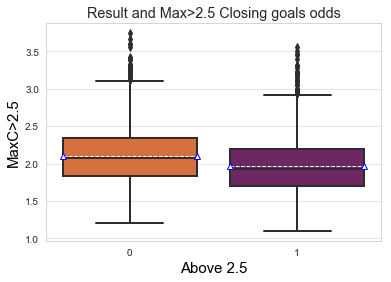

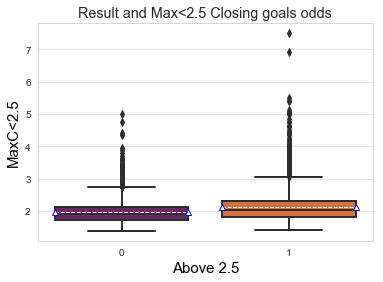

In [510]:
sns.boxplot(data=df_new,x="Above 2.5",y="MaxC>2.5",palette="inferno_r", \
            meanline=True,showmeans=True,\
            meanprops={"marker":"^","markerfacecolor":"white", "markeredgecolor":"blue","color":"White"})
plt.title("Result and Max>2.5 Closing goals odds")
plt.xlabel("Above 2.5",size=15,color="Black")
plt.ylabel("MaxC>2.5",size=15,color="Black")
plt.show()

sns.boxplot(data=df_new,x="Above 2.5",y="Max<2.5",palette="inferno", \
            meanline=True,showmeans=True,\
            meanprops={"marker":"^","markerfacecolor":"white", "markeredgecolor":"blue","color":"White"})
plt.title("Result and Max<2.5 Closing goals odds")
plt.xlabel("Above 2.5",size=15,color="Black")
plt.ylabel("MaxC<2.5",size=15,color="Black")
plt.show()

In [ ]:
#The closing odds of Maximum odds above/under 2.5 goals shows similar trends to normal odds 
#It can be assumed that the closing and normal odds are correlated.

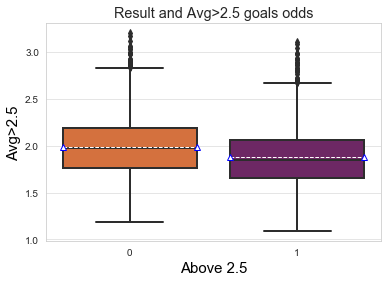

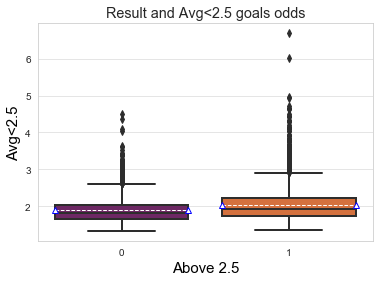

In [502]:
sns.boxplot(data=df_new,x="Above 2.5",y="Avg>2.5",palette="inferno_r", \
            meanline=True,showmeans=True,\
            meanprops={"marker":"^","markerfacecolor":"white", "markeredgecolor":"blue","color":"White"})
plt.title("Result and Avg>2.5 goals odds")
plt.xlabel("Above 2.5",size=15,color="Black")
plt.ylabel("Avg>2.5",size=15,color="Black")
plt.show()

sns.boxplot(data=df_new,x="Above 2.5",y="Avg<2.5",palette="inferno", \
            meanline=True,showmeans=True,\
            meanprops={"marker":"^","markerfacecolor":"white", "markeredgecolor":"blue","color":"White"})
plt.title("Result and Avg<2.5 goals odds")
plt.xlabel("Above 2.5",size=15,color="Black")
plt.ylabel("Avg<2.5",size=15,color="Black")
plt.show()

In [ ]:
#Average odds for goals greater than 2.5 also shows similar pattern like B365

In [ ]:
sns.boxplot(data=df_new,x="Above 2.5",y="Avg>2.5",palette="inferno_r", \
            meanline=True,showmeans=True,\
            meanprops={"marker":"^","markerfacecolor":"white", "markeredgecolor":"blue","color":"White"})
plt.title("Result and Avg>2.5 goals odds")
plt.xlabel("Above 2.5",size=15,color="Black")
plt.ylabel("Avg>2.5",size=15,color="Black")
plt.show()

sns.boxplot(data=df_new,x="Above 2.5",y="Avg<2.5",palette="inferno", \
            meanline=True,showmeans=True,\
            meanprops={"marker":"^","markerfacecolor":"white", "markeredgecolor":"blue","color":"White"})
plt.title("Result and Avg<2.5 goals odds")
plt.xlabel("Above 2.5",size=15,color="Black")
plt.ylabel("Avg<2.5",size=15,color="Black")
plt.show()

In [504]:
df_new['SH_AG'] = df_new['FTAG'] - df_new['HTAG']
df_new['SH_HG'] = df_new['FTHG'] - df_new['HTHG']

In [505]:
df_new.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 0.1,Unnamed: 1.1,AHCh,AHh,Avg<2.5,Avg>2.5,AvgA,AvgAHA,...,AST_Avg_2,AC_Avg_2,HF_Avg_2,AF_Avg_2,HY_Avg_2,AY_Avg_2,HR_Avg_2,AR_Avg_2,SH_AG,SH_HG
0,NaN,388,NaN,5763,0.25,0.25,1.54,2.39,2.42,2.08,...,5.8,3.0,14.0,17.2,1.6,1.4,0.0,0.2,2,1
1,NaN,4062,NaN,5773,0.75,0.75,1.61,2.24,1.59,1.78,...,2.0,5.4,12.2,19.6,2.0,1.2,0.0,0.0,1,0
2,NaN,2922,NaN,5786,0.50,0.50,1.56,2.34,1.91,1.91,...,2.0,4.8,8.6,10.4,2.0,1.8,0.2,0.0,0,0
3,NaN,3896,NaN,5804,-1.00,-1.00,1.83,1.94,5.82,1.83,...,4.0,3.0,18.2,15.4,1.2,2.2,0.4,0.0,0,1
4,NaN,4052,NaN,5818,0.00,0.25,1.54,2.37,2.32,1.98,...,4.6,4.4,15.6,19.8,2.6,2.8,0.0,0.0,0,3


In [506]:
df_new['SH_AG'] = abs(df_new['SH_AG'])
df_new['SH_HG'] = abs(df_new['SH_HG'])

In [511]:
df_new.to_excel("df_new.xlsx")

C:\Users\USER\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


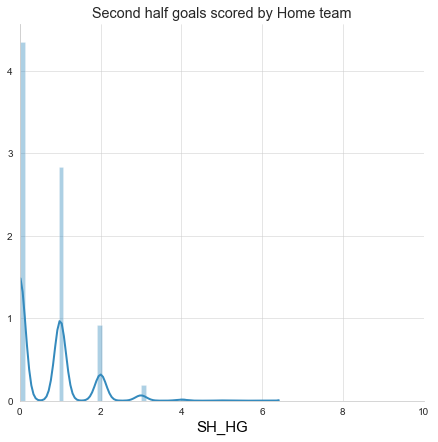

C:\Users\USER\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


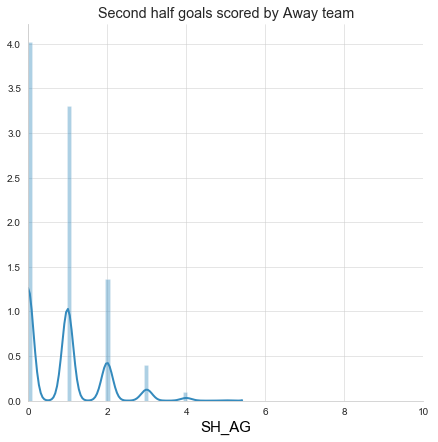

In [513]:
sns.set_style("whitegrid")
a=sns.FacetGrid(df_new,size=6) \
   .map(sns.distplot,"SH_AG") \
   .add_legend()
plt.xlim(0,10)
plt.xlabel("SH_HG",size=15,color="Black")
plt.title("Second half goals scored by Home team")
plt.show()
sns.set_style("whitegrid")
sns.FacetGrid(df_new,size=6,) \
   .map(sns.distplot,"SH_HG") \
   .add_legend()
plt.xlabel("SH_AG",size=15,color="Black")
plt.title("Second half goals scored by Away team")
plt.xlim(0,10)
plt.show()

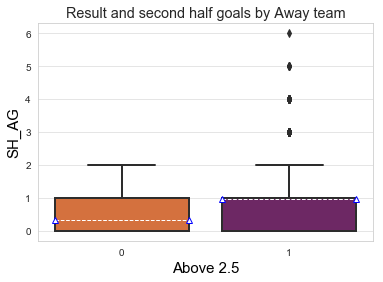

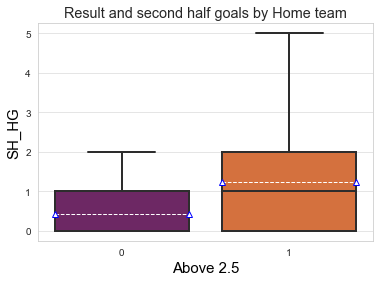

In [515]:
sns.boxplot(data=df_new,x="Above 2.5",y="SH_AG",palette="inferno_r", \
            meanline=True,showmeans=True,\
            meanprops={"marker":"^","markerfacecolor":"white", "markeredgecolor":"blue","color":"White"})
plt.title("Result and second half goals by Away team")
plt.xlabel("Above 2.5",size=15,color="Black")
plt.ylabel("SH_AG",size=15,color="Black")
plt.show()

sns.boxplot(data=df_new,x="Above 2.5",y="SH_HG",palette="inferno", \
            meanline=True,showmeans=True,\
            meanprops={"marker":"^","markerfacecolor":"white", "markeredgecolor":"blue","color":"White"})
plt.title("Result and second half goals by Home team")
plt.xlabel("Above 2.5",size=15,color="Black")
plt.ylabel("SH_HG",size=15,color="Black")
plt.show()